In [1]:
import pandas as pd
file_path = "phishing.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [2]:
df = df.drop(columns=["Index"])

# Split features and target variable
X = df.drop(columns=["class"])
y = df["class"]

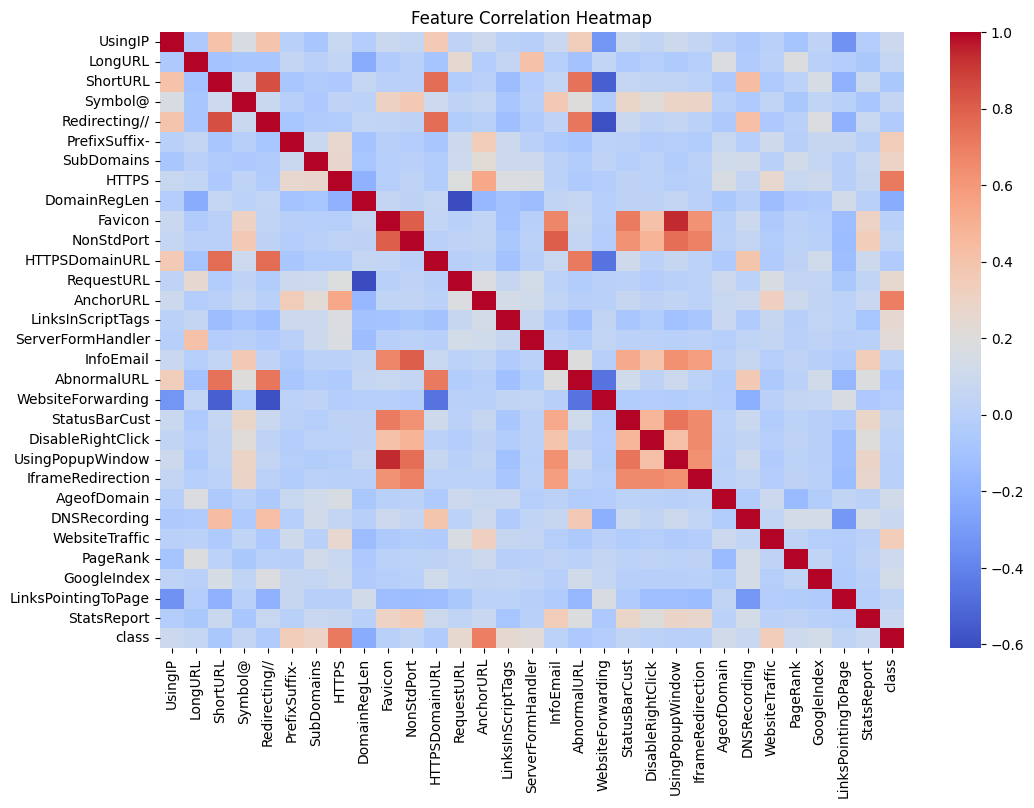

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\SANKET\AppData\Local\Temp\ipykernel_9964\2993405076.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:15], y=feature_importance.index[:15], palette="viridis")


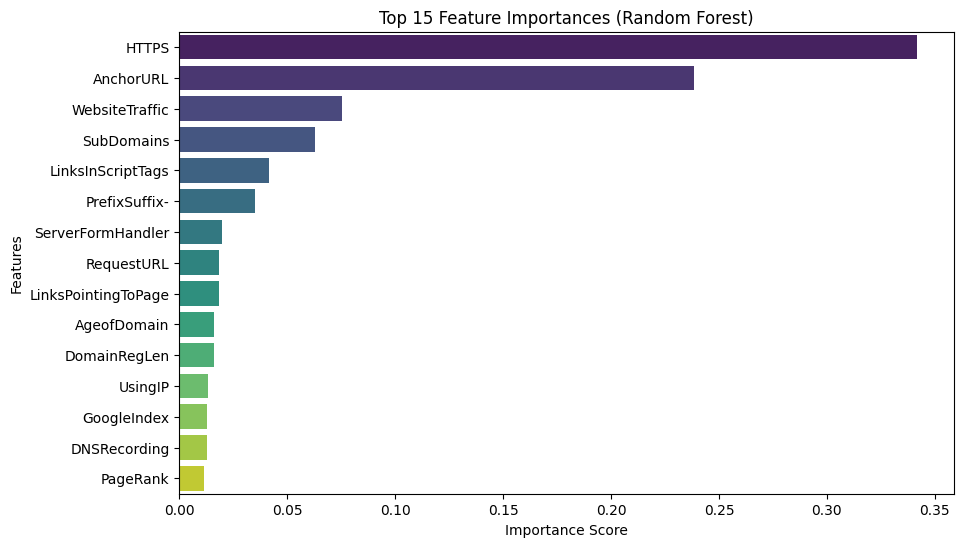

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:15], y=feature_importance.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

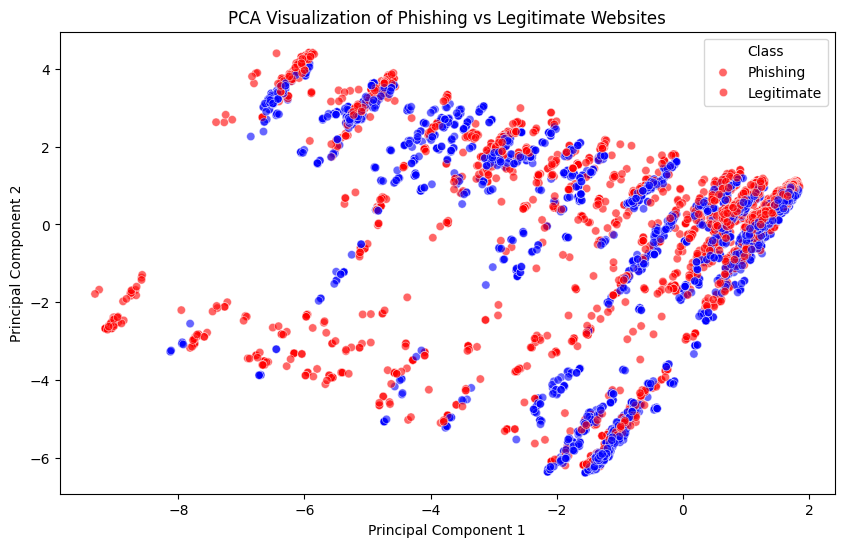

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette={-1: 'red', 1: 'blue'}, alpha=0.6)
plt.title("PCA Visualization of Phishing vs Legitimate Websites")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class", labels=["Phishing", "Legitimate"])
plt.show()

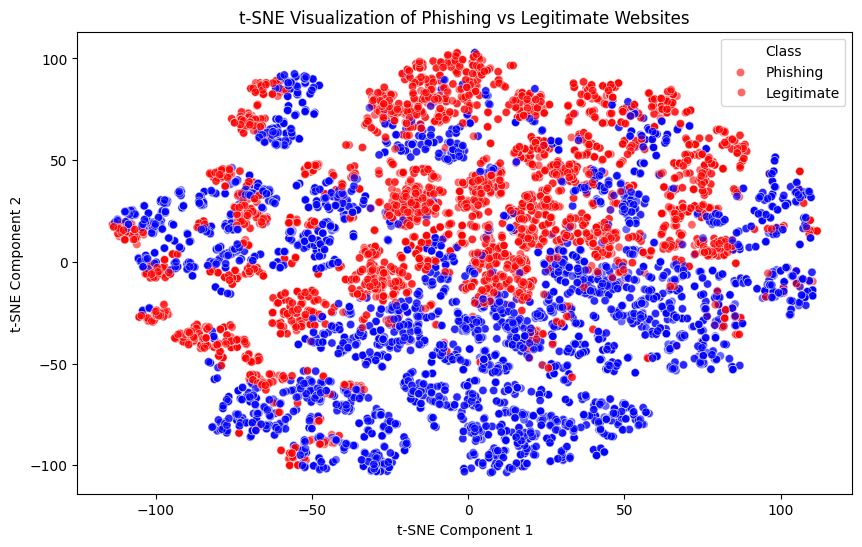

In [6]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot for t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette={-1: 'red', 1: 'blue'}, alpha=0.6)
plt.title("t-SNE Visualization of Phishing vs Legitimate Websites")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Class", labels=["Phishing", "Legitimate"])
plt.show()

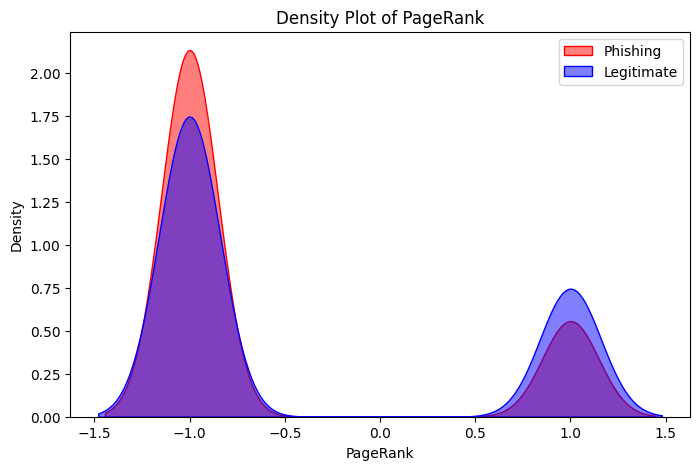

In [7]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["class"] == -1]["PageRank"], fill=True, color="red", label="Phishing", alpha=0.5)
sns.kdeplot(df[df["class"] == 1]["PageRank"], fill=True, color="blue", label="Legitimate", alpha=0.5)
plt.title("Density Plot of PageRank")
plt.xlabel("PageRank")
plt.legend()
plt.show()


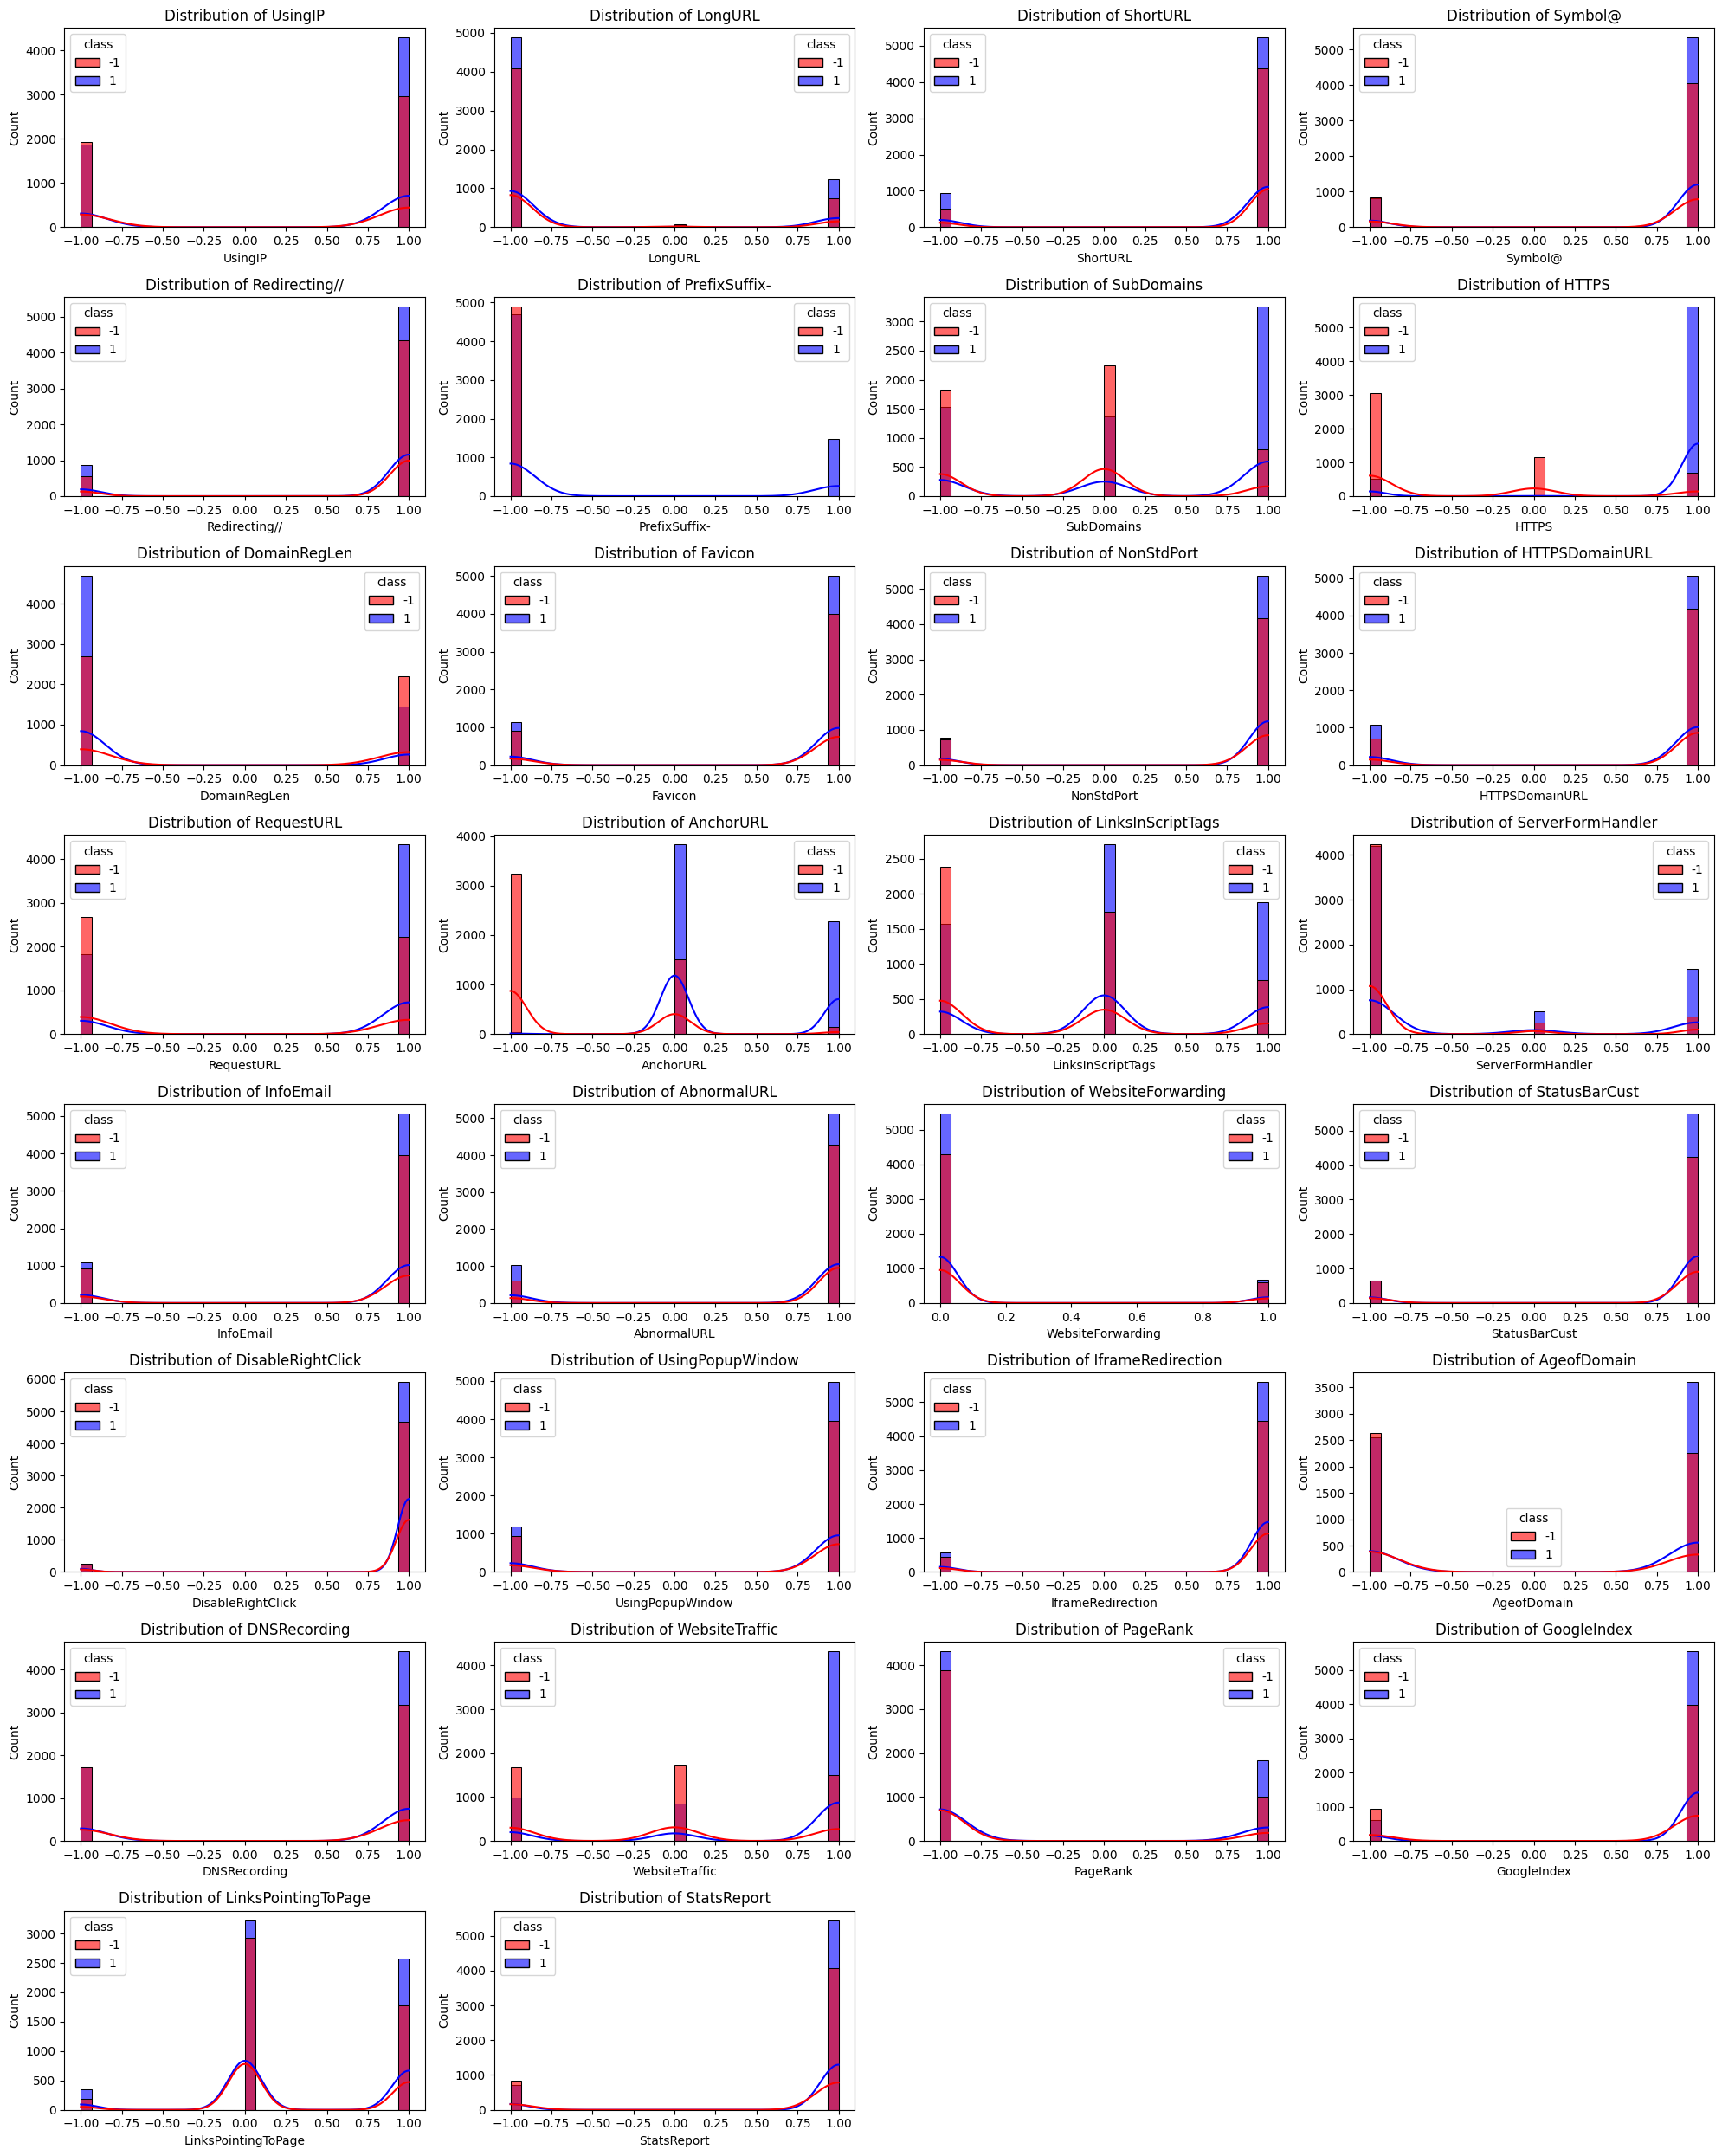

In [10]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(X.columns):
    plt.subplot(8, 4, i + 1)
    sns.histplot(df, x=feature, hue="class", kde=True, palette={-1: "red", 1: "blue"}, bins=30, alpha=0.6)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


C:\Users\SANKET\AppData\Local\Temp\ipykernel_9964\102590099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


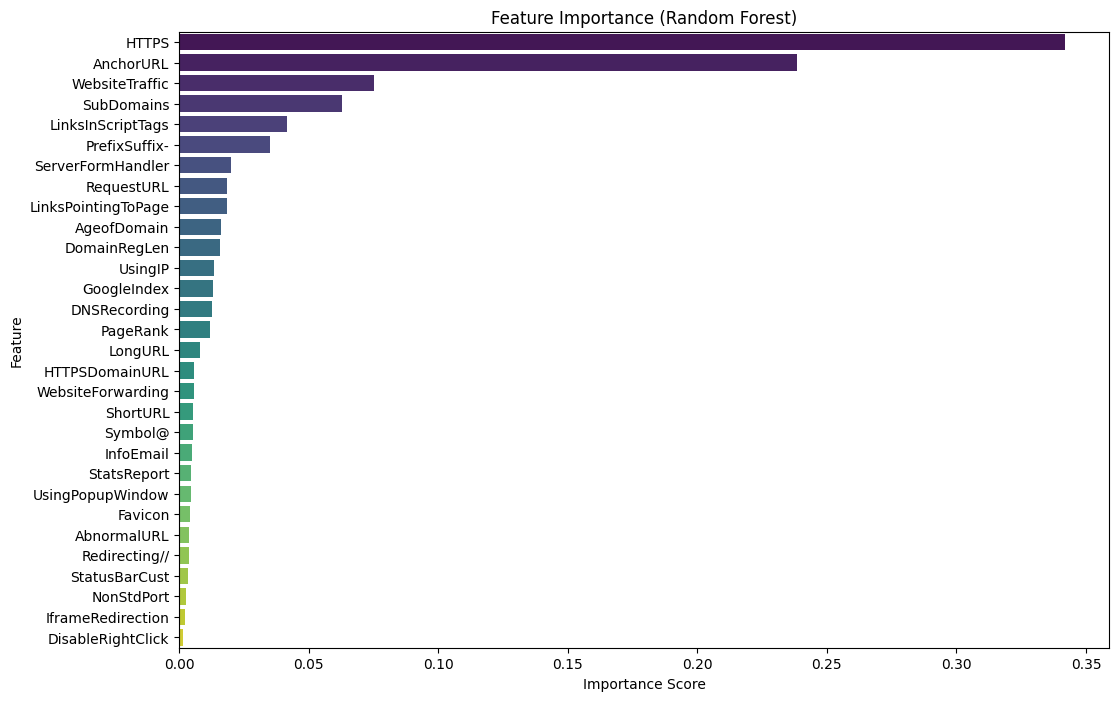

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

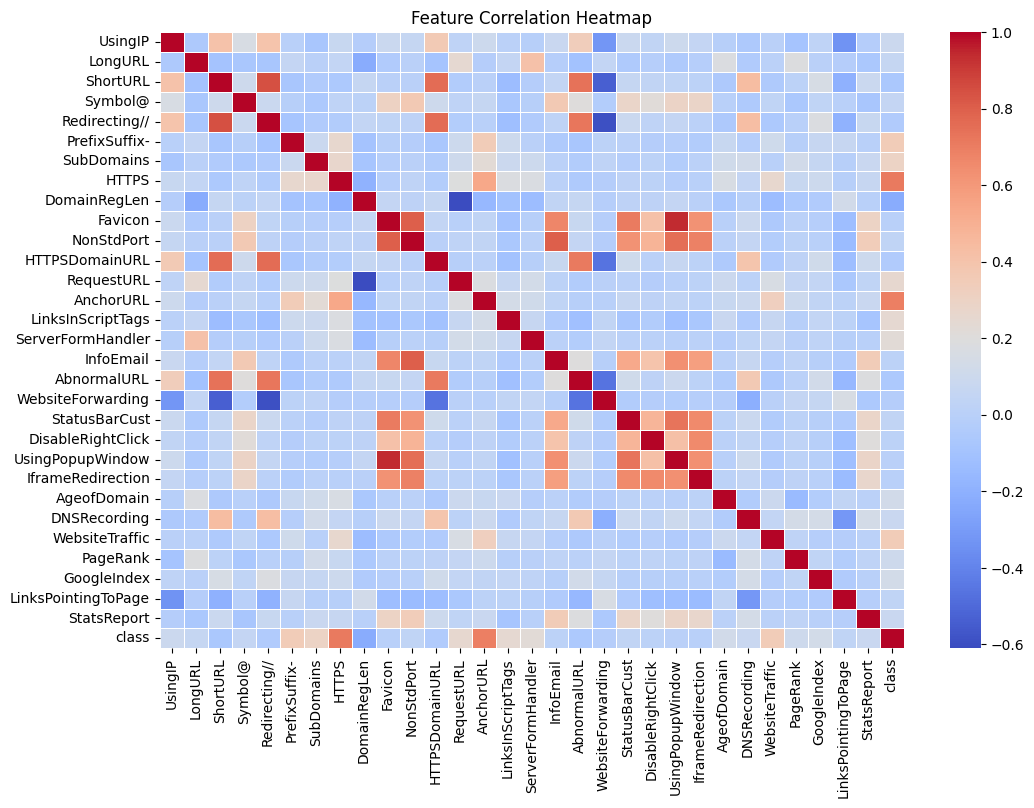

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

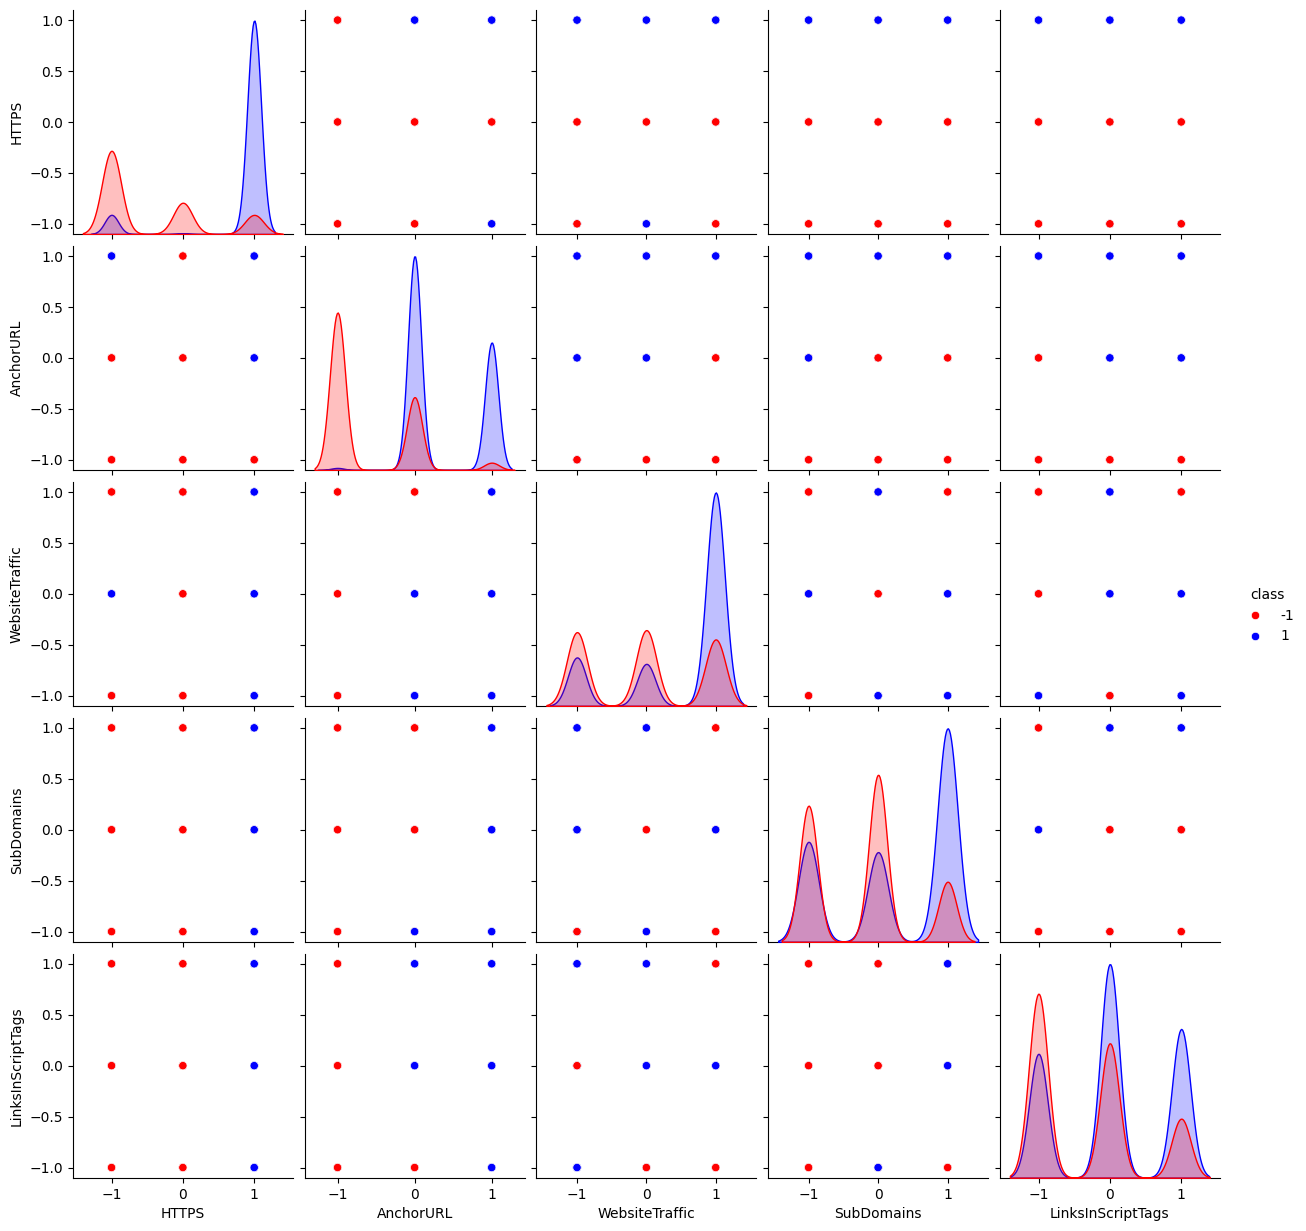

In [16]:
key_features = feature_importance_df["Feature"].head(5).tolist()
sns.pairplot(df, hue="class", vars=key_features, palette={-1: "red", 1: "blue"})
plt.show()